In [1]:
# ## 📌 GloVe vs Word2Vec (Clean & Correct Notes)

# ---

# ## 🔷 GloVe (Global Vectors for Word Representation)

# **Core Idea:**
# Build a **word–word co-occurrence matrix** from the entire corpus and learn embeddings using matrix factorization.

# ### 🔹 Uses:

# * Global corpus statistics
# * Co-occurrence probabilities
# * Linear algebra (matrix factorization)

# ### 🔹 Objective (Conceptual)

# Learns word vectors so that:

# [
# \text{Word}_i \cdot \text{Word}*j \approx \log(P*{ij})
# ]

# Where:

# * ( P_{ij} ) = probability that word *j* appears in context of word *i*

# ### 🔹 Key Points

# * Uses **global information**
# * Captures meaningful linear relationships
# * Good semantic structure

# ---

# ## 🔷 Word2Vec

# **Core Idea:**
# Learns embeddings by **predicting context words**.

# Two approaches:

# * **CBOW** → Predict target word from context
# * **Skip-gram** → Predict context from target word

# ### 🔹 Uses:

# * Local context window
# * Neural network training
# * Does NOT explicitly build full co-occurrence matrix

# ### 🔹 Key Points

# * Uses **local context only**
# * Efficient for large datasets
# * Learns through prediction task

# ---

# ## 🔥 Main Difference

# | GloVe                            | Word2Vec                       |
# | -------------------------------- | ------------------------------ |
# | Uses global co-occurrence matrix | Uses local context window      |
# | Matrix factorization             | Prediction-based model         |
# | Uses corpus statistics directly  | Learns indirectly via training |

# ---

# ### 🎯 Simple Intuition

# * **GloVe** = “Count-based + linear algebra”
# * **Word2Vec** = “Prediction-based neural model”

# If you want, I can also explain this from an interview perspective in 5 sharp points.



In [2]:
# https://nlp.stanford.edu/pubs/glove.pdf

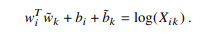

## NLP Visualizing Embeddings


# Dimensionality Reduction

Suppose we want to reduce dimensions from **100D → 2D**.  
This allows us to visually:

1. See similar words clustered together  
2. See opposite or unrelated words separated  

Example reduction flow:
- 1000 → 100  
- 100 → 10  
- 10 → 2  

### Why Reduce Dimensions?

To handle the **curse of dimensionality**:
- High-dimensional space becomes sparse  
- Distance metrics become less meaningful  
- Models become computationally expensive  
- Overfitting risk increases  

---

# Types of Dimensionality Reduction

## 1️⃣ Feature Selection
Select a subset of original features.  
(No transformation, just selection.)

## 2️⃣ Feature Extraction
Create new features from existing ones.

Example:  
If we have **height** and **weight**,  
we can create **BMI** as a new feature that represents both.

---

# PCA (Principal Component Analysis)

PCA combines features and finds new directions where data varies the most.

These directions are called **Principal Components**.

Instead of using original features, we use these components.

---

## How PCA Works

1. Standardize the data  
2. Compute covariance matrix  
3. Compute eigenvalues and eigenvectors  
4. Select top components (based on highest eigenvalues)  
5. Project data onto selected components  

If we choose 2 components:
- **PC1** → Contains most information (maximum variance)  
- **PC2** → Contains second most information  

---

## Limitations of PCA

1. Linear method (captures only linear relationships)  
2. Cannot capture complex non-linear structures  

---

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a non-linear dimensionality reduction technique.

### What It Preserves:
- Local structure (nearby points stay close)
- Useful for visualization (especially 2D/3D)

### How It Works:
- Converts distances into probabilities  
- Minimizes difference between high-dimensional and low-dimensional distributions  
- Uses **KL Divergence** as loss function  

---

### Key Difference

| PCA | t-SNE |
|------|--------|
| Linear | Non-linear |
| Preserves global variance | Preserves local structure |
| Fast & scalable | Slower, mainly for visualization |



In [6]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
model=api.load("glove-wiki-gigaword-100")
print("Loaded..")

Loaded..


In [7]:
words = [
    "king", "queen", "man", "woman",
    "dog", "cat", "animal",
    "car", "truck", "bus", "vehicle",
    "happy", "sad", "joy", "anger"
]

In [8]:
vectors=[model[word] for word in words]

In [9]:
vectors[0].shape

(100,)

In [11]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)


In [12]:
reduced.shape

(15, 2)

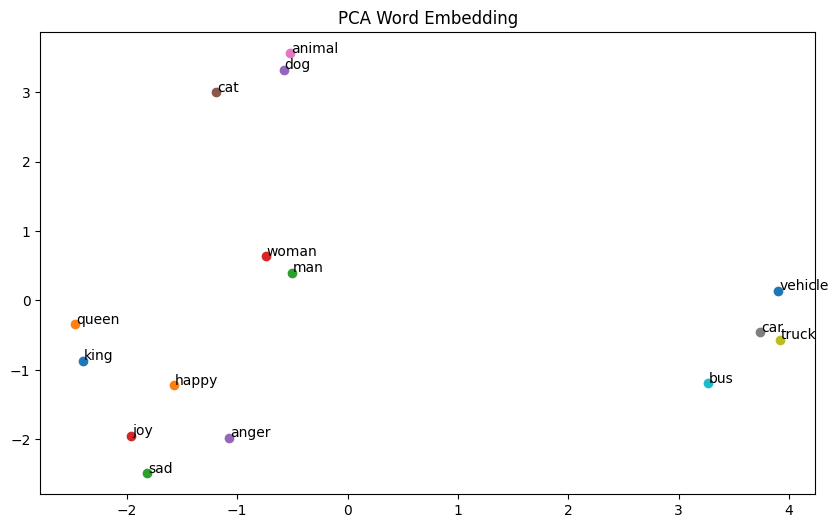

In [16]:
plt.figure(figsize=(10,6))

for i, word in enumerate(words):
    x = reduced[i][0]
    y = reduced[i][1]
    
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.title("PCA Word Embedding")

plt.show()

In [19]:
from sklearn.manifold import TSNE

In [20]:
import numpy as np

In [21]:
vectors=np.array([model[word] for word in words])

In [32]:
tsne=TSNE(n_components=2, perplexity=1)

reduced = tsne.fit_transform(vectors)

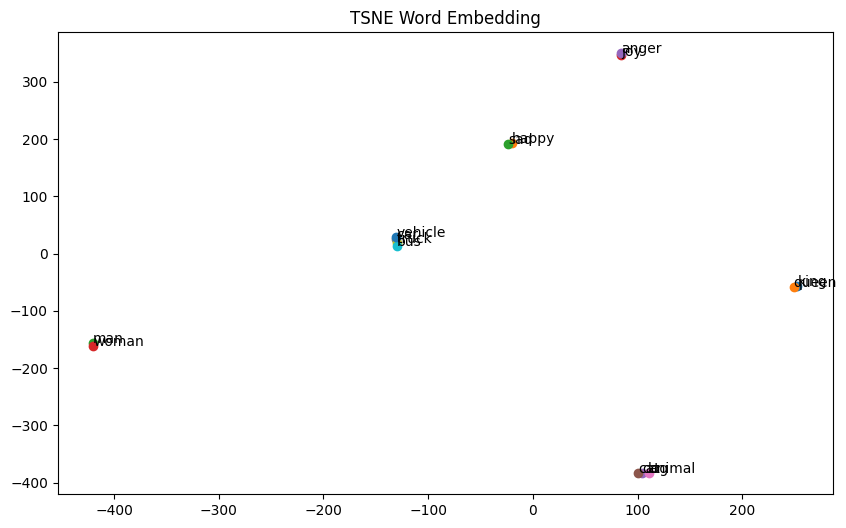

In [33]:
plt.figure(figsize=(10,6))

for i, word in enumerate(words):
    x = reduced[i][0]
    y = reduced[i][1]
    
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.title("TSNE Word Embedding")

plt.show()